### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# k-NN 분류 (최근접 이웃)

## (참고) 와인 데이터 테스트

### k-NN 적용

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = np.loadtxt('winequality-red.csv', skiprows=1, delimiter=';')

In [4]:
wine.shape

(1599, 12)

In [5]:
wine[:100,-1]

array([5., 5., 5., 6., 5., 5., 5., 7., 7., 5., 5., 5., 5., 5., 5., 5., 7.,
       5., 4., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6.,
       5., 6., 6., 7., 4., 5., 5., 4., 6., 5., 5., 4., 5., 5., 5., 5., 5.,
       6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5., 7., 5., 5., 5., 5., 5.,
       5., 6., 6., 5., 5., 4., 5., 5., 5., 6., 5., 4., 5., 5., 5., 5., 6.,
       5., 6., 5., 5., 5., 5., 6., 5., 5., 4., 6., 5., 5., 5., 6.])

In [8]:
np.bincount(np.array(wine[:,-1],dtype=int))

array([  0,   0,   0,  10,  53, 681, 638, 199,  18], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
X = wine[:,:-1]
y = wine[:,-1]

In [18]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
pred_y = model.predict(X)
display(pred_y[:20], y[:20])

array([5., 5., 5., 6., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       4., 5., 5.])

array([5., 5., 5., 6., 5., 5., 5., 7., 7., 5., 5., 5., 5., 5., 5., 5., 7.,
       5., 4., 6.])

In [22]:
model.score(X,y)

0.7554721701063164

In [20]:
(np.abs(pred_y - y)>2).sum()

12

In [23]:
idx = np.where(np.abs(pred_y - y)>2)[0]
display(y[idx], pred_y[idx])

array([8., 8., 7., 7., 8., 6., 7., 7., 8., 4., 8., 8.])

array([5., 5., 4., 4., 5., 3., 3., 4., 5., 7., 5., 4.])

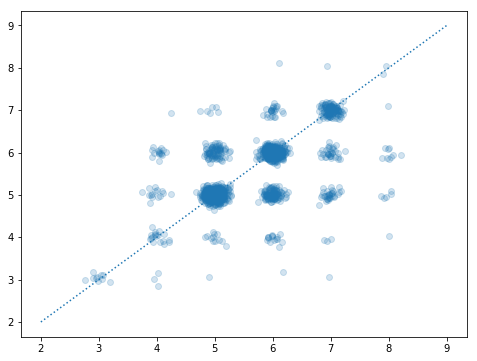

In [25]:
plt.figure(figsize=[8,6])
plt.plot([2,9],[2,9],':')
plt.scatter(y+np.random.randn(len(y))/10, pred_y+np.random.randn(len(y))/10, alpha=0.2)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [24]:
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
pred_y_2 = model2.predict(X_test)

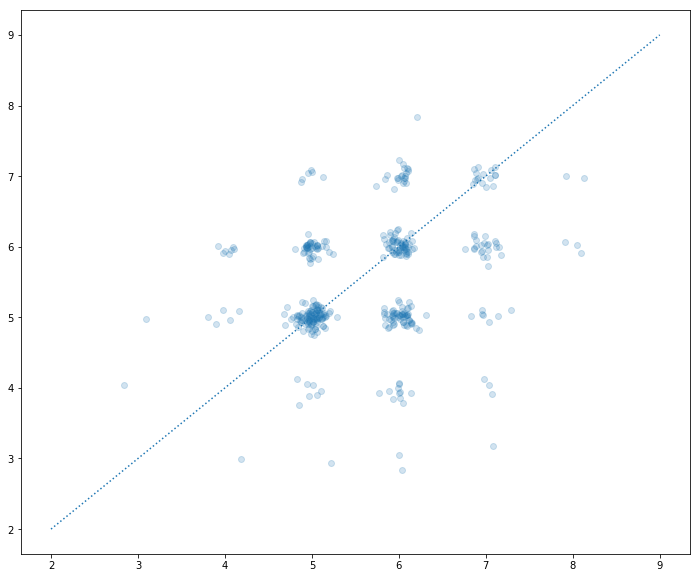

In [26]:
plt.figure(figsize=[12,10])
plt.plot([2,9],[2,9],':')
plt.scatter(y_test+np.random.randn(len(y_test))/10, pred_y_2+np.random.randn(len(y_test))/10, alpha=0.2)

### 선형회귀 적용

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model3 = LinearRegression()

model3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
pred_y_3 = model3.predict(X)

In [29]:
(np.abs(pred_y_3 - y)>2).sum()

9

(array([  0.,   0.,   0.,   1.,  17.,  70., 275., 371., 575., 201.,  58.,
         23.,   7.,   1.,   0.,   0.,   0.]),
 array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
         1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 17 Patch objects>)

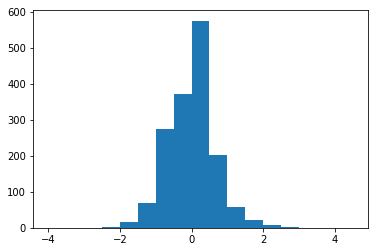

In [36]:
plt.hist(pred_y_3 - y, bins=np.arange(-4,5,0.5))